Email Phising Detector

In [1]:
import ipykernel

In [2]:
import pandas as pd, matplotlib, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("email_phishing_data.csv")
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,phishing
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [4]:
df["log_num_words"] = np.log1p(df["num_words"])

phishing_emails = df[df["phishing"] == 1]
non_phishing_emails = df[df["phishing"] == 0]

## Visualisation

### Word Count Distribution

In [5]:
# Check for missing or zero values in the num_words column
df["num_words"].describe()

count    5.248460e+05
mean     2.762280e+02
std      3.335457e+03
min      0.000000e+00
25%      4.700000e+01
50%      1.200000e+02
75%      2.690000e+02
max      2.339682e+06
Name: num_words, dtype: float64

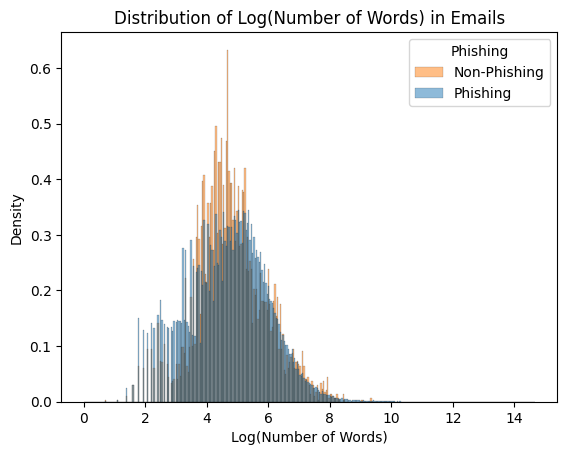

In [6]:
plot = sns.histplot(data=df,
                    x="log_num_words",
                    hue="phishing",
                    #bins=70,
                    stat="density",
                    common_norm=False)
plot.set_xlabel("Log(Number of Words)")
plot.set_ylabel("Density")
plot.set_title("Distribution of Log(Number of Words) in Emails")
plot.legend(title="Phishing", loc="upper right", labels=["Non-Phishing", "Phishing"])

In [ ]:
import plotly.express as px

# Interactive histogram
fig = px.histogram(
    df,
    x='log_num_words',
    color='phishing',
    histnorm='density',         # Normalize to density like Seaborn
    nbins=50,
    barmode='overlay',          # Overlay bars (you can also try 'stack')
    labels={'is_phishing': 'Phishing'},
    title='Distribution of Log(Number of Words) by Phishing Label'
)

fig.update_traces(opacity=0.6)  # Make overlapping bars visible
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['num_words', 'num_unique_words', 'num_stopwords', 'num_links', 'num_unique_domains', 'num_email_addresses', 'num_spelling_errors', 'num_urgent_keywords', 'phishing', 'log_num_words'] but received: is_phishing